In [1]:
import os
import itertools
import math

from collections import defaultdict
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.path import Path
import matplotlib.patches as patches

import seaborn as sns

plt.style.use(["science"])

In [2]:
results_folder = "../results/timeseries/"
models = os.listdir(results_folder)
models = ["MLP", "LSTM", "CNN", "TCN"]
frequencies = [50, 100, 200]
datasets = list(set([d.split("_")[0] for d in os.listdir(results_folder + models[0])]))
print(
    f"{len(models)} models and {len(datasets)} datasets\n",
    f'\tmodels: {", ".join(models)}\n',
    f'\tdatasets: {", ".join(datasets)}',
)
datasets = [
    "TwoPatterns",
    "CinCECGtorso",
    "TwoLeadECG",
    "Wafer",
    "pendigits",
    "FacesUCR",
    "Mallat",
    "FaceAll",
    "Symbols",
    "ItalyPowerDemand",
    "ECG5000",
    "MoteStrain",
    "NonInvasiveFetalECGThorax1",
    "NonInvasiveFetalECGThorax2",
    "SwedishLeaf",
    "FordA",
    "Yoga",
    "UWaveGestureLibraryX",
    "FordB",
    "ElectricDevices",
    "UWaveGestureLibraryY",
    "UWaveGestureLibraryZ",
    "HandOutlines",
    "InsectWingbeatSound",
    "ShapesAll",
    "MedicalImages",
    "PhalangesOutlinesCorrect",
    "ChlorineConcentration",
    "Phoneme",
]

colors_list = ["#0051a2", "#ffd44f", "#f4777f", "#93003a", "#97964a"]
colors = {m: colors_list[i] for i, m in enumerate(models)}

data = defaultdict(lambda: defaultdict(dict))
for d, m, f in itertools.product(datasets, models, frequencies):
    df = pd.read_csv(f"{results_folder}/{m}/{d}_{f}.csv")
    data[d][m][f] = df.copy()


f = 200  # ms
means = {d: {m: data[d][m][f].metric[10:].mean() for m in models} for d in datasets}

df = pd.DataFrame(means).T
df.to_csv("table.csv")
df.loc["MEAN"] = df.mean()
df.loc["STD"] = df.std()
df.loc["RANK"] = df.rank(axis=1, ascending=False).mean()

display(df)

4 models and 29 datasets
 	models: MLP, LSTM, CNN, TCN
 	datasets: TwoPatterns, Yoga, pendigits, MoteStrain, CinCECGtorso, Symbols, PhalangesOutlinesCorrect, ChlorineConcentration, UWaveGestureLibraryX, FordB, ElectricDevices, Mallat, ItalyPowerDemand, FordA, FacesUCR, FaceAll, MedicalImages, HandOutlines, InsectWingbeatSound, ECG5000, ShapesAll, NonInvasiveFetalECGThorax1, Wafer, TwoLeadECG, UWaveGestureLibraryY, SwedishLeaf, Phoneme, NonInvasiveFetalECGThorax2, UWaveGestureLibraryZ


,MLP,LSTM,CNN,TCN
TwoPatterns,0.740763,0.964360,0.960313,0.964176
CinCECGtorso,0.381459,0.875045,0.930336,0.805216
TwoLeadECG,0.535526,0.816392,0.953879,0.886127
Wafer,0.926341,0.963884,0.965427,0.953552
pendigits,0.965390,0.964356,0.973604,0.969426
FacesUCR,0.716113,0.842495,0.850164,0.819256
Mallat,0.898522,0.903537,0.967583,0.920638
FaceAll,0.704407,0.867729,0.842372,0.820430
Symbols,0.857217,0.876175,0.919234,0.895132
ItalyPowerDemand,0.918619,0.865839,0.916384,0.914688


In [3]:
means = {
    d: {
        (m, f): data[d][m][f].metric[10:].mean()
        for m, f in product(models, frequencies)
    }
    for d in datasets
}
pd.DataFrame(means).T

MLP                          LSTM            \
                                 50        100       200       50        100   
TwoPatterns                 0.767474  0.723647  0.740763  0.939648  0.956891   
CinCECGtorso                0.376054  0.376164  0.381459  0.631530  0.776950   
TwoLeadECG                  0.750813  0.655613  0.535526  0.669936  0.708659   
Wafer                       0.947959  0.933371  0.926341  0.958406  0.960310   
pendigits                   0.961864  0.964938  0.965390  0.943399  0.960663   
FacesUCR                    0.653098  0.694020  0.716113  0.751611  0.783992   
Mallat                      0.873921  0.904088  0.898522  0.808228  0.871505   
FaceAll                     0.658822  0.682597  0.704407  0.795212  0.843588   
Symbols                     0.763804  0.840213  0.857217  0.751906  0.868063   
ItalyPowerDemand            0.912274  0.901319  0.918619  0.790506  0.875798   
ECG5000                     0.857194  0.814646  0.809566  0.846946  0.859701   
MoteStrain                  0.710637  0.725523  0.741848  0.606004  0.775330   
NonInvasiveFetalECGThorax1  0.043598  0.000104  0.049588  0.181868  0.000010   
NonInvasiveFetalECGThorax2  0.070634  0.032659  0.037546 -0.000158  0.642533   
SwedishLeaf                 0.504889  0.550742  0.634207  0.509882  0.608099   
FordA                      -0.004732  0.000058 -0.002808  0.381551  0.448890   
Yoga                        0.043194  0.007497  0.050836  0.590019  0.646758   
UWaveGestureLibraryX        0.619314  0.605977  0.588875  0.677008  0.688563   
FordB                      -0.004081  0.005566 -0.008285  0.316306  0.358293   
ElectricDevices             0.466471  0.455252  0.437556  0.637530  0.637166   
UWaveGestureLibraryY        0.570138  0.572255  0.573847  0.581148  0.579842   
UWaveGestureLibraryZ        0.561644  0.521090  0.550524  0.607564  0.604966   
HandOutlines                0.034584  0.010236  0.005870  0.228341  0.156909   
InsectWingbeatSound         0.550362  0.554596  0.552452  0.567931  0.567538   
ShapesAll                   0.360489  0.376335  0.425082  0.283341  0.378740   
MedicalImages               0.332818  0.425018  0.402624  0.240877  0.369879   
PhalangesOutlinesCorrect    0.103732  0.122797  0.140466  0.326905  0.405721   
ChlorineConcentration       0.000000  0.001902  0.000000  0.000000  0.117689   
Phoneme                     0.005557 -0.000879  0.002191  0.004397  0.020441   

                                           CNN                           TCN  \
                                 200       50        100       200       50    
TwoPatterns                 0.964360  0.961880  0.956836  0.960313  0.942679   
CinCECGtorso                0.875045  0.893350  0.905079  0.930336  0.671395   
TwoLeadECG                  0.816392  0.934007  0.942067  0.953879  0.783286   
Wafer                       0.963884  0.965887  0.969429  0.965427  0.956585   
pendigits                   0.964356  0.972826  0.970749  0.973604  0.968686   
FacesUCR                    0.842495  0.802166  0.833057  0.850164  0.743477   
Mallat                      0.903537  0.948093  0.952903  0.967583  0.820109   
FaceAll                     0.867729  0.824561  0.819569  0.842372  0.556528   
Symbols                     0.876175  0.880155  0.896370  0.919234  0.780518   
ItalyPowerDemand            0.865839  0.923190  0.936426  0.916384  0.920906   
ECG5000                     0.872991  0.860650  0.867603  0.871698  0.861340   
MoteStrain                  0.768342  0.783798  0.807467  0.794367  0.680609   
NonInvasiveFetalECGThorax1  0.620426  0.714048  0.755984  0.735442  0.492517   
NonInvasiveFetalECGThorax2  0.618495  0.734764  0.796197  0.808615  0.585905   
SwedishLeaf                 0.673779  0.698963  0.755939  0.752297  0.579095   
FordA                       0.396936  0.505205  0.543998  0.526236  0.691601   
Yoga                        0.685855  0.679454  0.646931  0.670886  0.612927   
UWaveGestureLibraryX        0.68

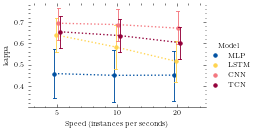

In [4]:
means = [
    [d, m, int(1000 / f), data[d][m][f].metric[:].mean()]
    for d, m, f in product(datasets, models, frequencies)
]
means_df = pd.DataFrame(means, columns=["dataset", "Model", "speed", "kappa"])

plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = 0.6 * fig_width_pt * inches_per_pt  # width in inches
fig_height = 1 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

with plt.rc_context({"lines.linewidth": 0.75}):
    g = sns.catplot(
        x="speed",
        y="kappa",
        hue="Model",
        dodge=0.1,
        ci=95,
        join=True,
        capsize=0.05,
        errwidth=0.9,
        palette=colors,
        height=fig_height,
        aspect=1 / golden_mean,
        kind="point",
        data=means_df,
        linestyles=":",
        linewidth=0.001,
    )
g.despine(left=True)
plt.xlabel("Speed (instances per seconds)")
plt.savefig("images/stream_speed.pdf", dpi=300)
plt.savefig("images/stream_speed.png", dpi=300)

/home/pedrolarben/tensorflow/lib/python3.8/site-packages/matplotlib/ticker.py:2896: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/pedrolarben/tensorflow/lib/python3.8/site-packages/matplotlib/ticker.py:2896: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


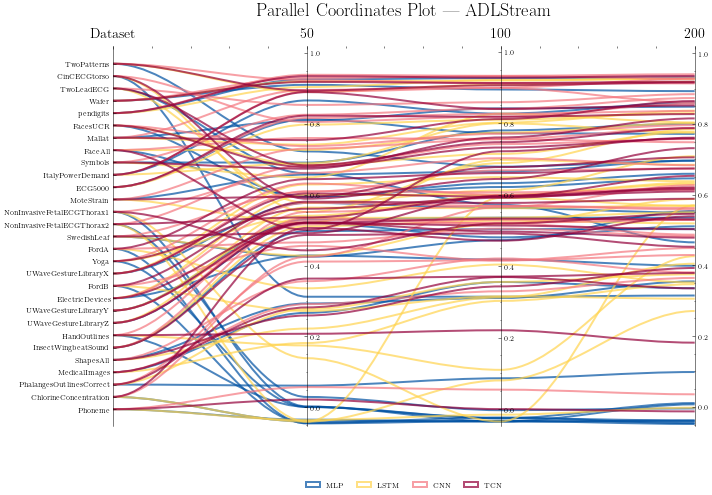

In [5]:
means = [
    [(len(datasets) - i) / len(datasets), d, m]
    + [data[d][m][f].metric[:].mean() for f in frequencies]
    for m in models
    for i, d in enumerate(datasets)
]
means_df = pd.DataFrame(
    means, columns=["Dataset", "dataset_name", "model"] + [str(f) for f in frequencies]
)
means_df

iris = None
ynames = ["Dataset"] + [str(f) for f in frequencies]
ys = means_df[ynames].values
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = ys[:, 1:]


fig, host = plt.subplots(figsize=(10, 7))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if ax != host:
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("right")
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
    if i == 0:
        ax.set_yticks(
            [(len(datasets) - i) / len(datasets) for i in range(len(datasets))]
        )
        ax.set_yticklabels(datasets)

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis="x", which="major", pad=7)
host.spines["right"].set_visible(False)
host.xaxis.tick_top()
host.set_title("Parallel Coordinates Plot — ADLStream", fontsize=18, pad=12)

legend_handles = [None for _ in means_df["dataset_name"].values]
for j in range(ys.shape[0]):
    # create bezier curves
    verts = list(
        zip(
            [x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
            np.repeat(zs[j, :], 3)[1:-1],
        )
    )
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(
        path, facecolor="none", lw=2, alpha=0.7, edgecolor=colors[means_df.model[j]]
    )
    legend_handles[models.index(means_df.model[j])] = patch
    host.add_patch(patch)
host.legend(
    legend_handles,
    models,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=len(models),
    fancybox=True,
    shadow=True,
)
plt.tight_layout()
plt.show()